<a href="https://colab.research.google.com/github/UCR-Research-Computing/Useful-Google-Colab-Notebooks/blob/main/Nautilus_Tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
#@title Setting Up Nautilus Access
!curl -LO -s https://storage.googleapis.com/kubernetes-release/release/v1.19.0/bin/linux/amd64/kubectl
!chmod +x ./kubectl
!mv ./kubectl /usr/local/bin/kubectl
!mkdir -p ~/.kube

from google.colab import files
uploaded = files.upload()

!mv ./config ~/.kube/.
!kubectl get pod

mv: cannot stat './config': No such file or directory


# Start

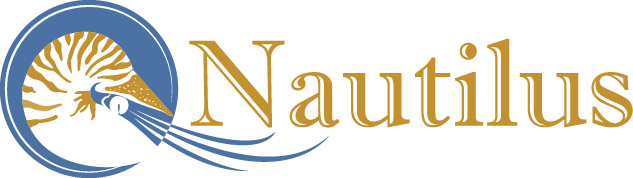

In [ ]:
#@title Delete All:
what = "jobs" #@param ["pods", "jobs", "pvc", "hpa", "service"]
!kubectl delete $what --all

/bin/bash: kubectl: command not found


# Tests

In [ ]:
running_pods = !kubectl get pods --no-headers | awk '{print $1}'
running_pods_state = !kubectl get pods --no-headers | awk '{print $3}'
running_pods_dict = zip(running_pods, running_pods_state)
list(running_pods_dict)

[('rc-job-generator-62722073-bcnsv', 'ContainerCreating')]

In [ ]:
#@title Show info:
how = "get" #@param ["get", "describe"]
what = "jobs" #@param ["pods", "jobs", "pvc", "hpa", "service"]
!kubectl $how $what


No resources found in ucr-rc namespace.


In [ ]:
running_pods = !kubectl get pods --no-headers | awk '{print $1}'
for pods in running_pods:
  print(pods)

# Instance Generator



In [ ]:
#@title Generator

import random
jobname = "rc-job-generator-%s" % (random.randint(10000000,99999999))

container = "centos:latest"#@param ["ubuntu:latest", "centos:latest"] {allow-input: true}


submit = """cat <<EOF | kubectl apply -f -
apiVersion: batch/v1
kind: Job
metadata:
  name: %s
spec:
  template:
    spec:
      containers:
      - name: %s
        image: %s
        command: ["sleep", "infinity"]
        volumeMounts:
        - mountPath: /sharedvol
          name: sharedvol
        resources:
          limits:
            memory: 6Gi
            cpu: "4"
          requests:
            memory: 2Gi
            cpu: "1"
      volumes:
      - name: sharedvol
        persistentVolumeClaim:
          claimName: master-vol
      - name: git-repo
        emptyDir: {}
      restartPolicy: Never
  backoffLimit: 1
EOF""" % (jobname, jobname, container)
!$submit

job.batch/rc-job-generator-62722073 created


In [ ]:
#@title Delete Instance Generator Jobs
running_rc_job_generator_jobs = !kubectl get jobs --no-headers | grep rc-job-generator | awk '{print $1}'

for job in running_rc_job_generator_jobs:
  !kubectl delete job $job

job.batch "rc-job-generator-22549174" deleted


In [ ]:
#@title Show info:
how = "get" #@param ["get", "describe"]
what = "pods" #@param ["pods", "jobs", "pvc", "hpa", "service"]
!kubectl $how $what


error: the server doesn't have a resource type "pods"


In [ ]:
!kubectl exec -it rc-job-generator-50558221-7kc8s bash

# New Section

In [ ]:
#@title Get a Shell

import random
jobname = "rc-job-shell-%s" % (random.randint(10000000,99999999))

container = "centos:latest"#@param ["ubuntu:latest", "centos:latest"] {allow-input: true}


submit = """cat <<EOF | kubectl apply -f -
apiVersion: batch/v1
kind: Job
metadata:
  name: %s
spec:
  template:
    spec:
      containers:
      - name: %s
        image: %s
        command: ["sleep", "infinity"]
        volumeMounts:
        - mountPath: /sharedvol
          name: sharedvol
        resources:
          limits:
            memory: 6Gi
            cpu: "4"
          requests:
            memory: 2Gi
            cpu: "1"
      volumes:
      - name: sharedvol
        persistentVolumeClaim:
          claimName: master-vol
      - name: git-repo
        emptyDir: {}
      restartPolicy: Never
  backoffLimit: 1
EOF""" % (jobname, jobname, container)
!$submit


while True:
  print(jobname)
  result = !kubectl get pods --no-headers | grep $jobname | grep "Running"
  print(result)
  if not result:
    print("yes")
  else:
    print("no")
    podname = !kubectl get pods --no-headers --selector=job-name=$jobname | awk '{print $1}'
    !kubectl exec $podname -- bash
    break

[]
yes
rc-job-shell-88121305
[]
yes
rc-job-shell-88121305
[]
yes
rc-job-shell-88121305
[]
yes
rc-job-shell-88121305
[]
yes
rc-job-shell-88121305
[]
yes
rc-job-shell-88121305
[]
yes
rc-job-shell-88121305
[]
yes
rc-job-shell-88121305
[]
yes
rc-job-shell-88121305
[]
yes
rc-job-shell-88121305
['rc-job-shell-88121305-wxx92       1/1   Running             0     28s']
no
Error from server (NotFound): pods "[No resources found in ucr-rc namespace.]" not found
